In [169]:
import cv2
import glob
import pandas as pd
import plotly.express as px

# build_catalog.ipynb

In [170]:
# This cell is tagged with "parameters" to enable use by papermill

FILE_LIST_GLOB = '/home/aubrey/Desktop/tinian_sticky_trap_images/*/[0-9][0-9][0-9].png'
CATALOG_PATH = '/home/aubrey/Desktop/tinian_sticky_trap_images/catalog.csv'
PIXELS_PER_MM = 36.375

In [171]:
size_classes = [
    ['less-than-0.1-mm', 0.0, 0.1],
    ['0.1-to-0.2-mm', 0.1, 0.2],
    ['0.2-to-0.3-mm', 0.2, 0.3],
    ['0.3-to-0.4-mm', 0.3, 0.4],
    ['0.4-to-0.5-mm', 0.4, 0.5],
    ['0.5-to-0.6-mm', 0.5, 0.6],
    ['0.6-to-0.7-mm', 0.6, 0.7],
    ['0.7-to-0.8-mm', 0.7, 0.8],
    ['0.8-to-0.9-mm', 0.8, 0.9],
    ['0.9-to-1.0-mm', 0.9, 1.0],
    ['1-to-2-mm', 1, 2],
    ['2-to-3-mm', 2, 3],
    ['3-to-4-mm', 3, 4],
    ['4-to-5-mm', 4, 5],
    ['5-to-6-mm', 5, 6],
    ['6-to-7-mm', 6, 7],
    ['7-to-8-mm', 7, 8],
    ['8-to-9-mm', 8, 9],
    ['9-to-10-mm', 9, 10],
    ['greater-than-10-mm', 10.0, 1000.0]
]

In [172]:
def get_size_class(mm_size):
    for size_class in size_classes:
        if mm_size >= size_class[1] and mm_size < size_class[2]:
            return size_class[0]

# get_size_class(6.2)

In [173]:
images = glob.glob(FILE_LIST_GLOB)

In [174]:
mylist = []
for image in images:
    img = cv2.imread(image)
    height, width, _ = img.shape
    px_size = max(height, width)
    mm_size = px_size / PIXELS_PER_MM
    size_class = get_size_class(mm_size)
    mydict = {'path':image, 'height':height, 'width':width, 'px_size':px_size, 'mm_size':mm_size, 'size_class': size_class}
    mylist.append(mydict)

In [175]:
pd.set_option('display.max_colwidth', 0)
df = pd.DataFrame(mylist)
df['cluster'] = -1 # Add a column where cluster number will be stored.
df.to_csv(CATALOG_PATH, index=False)
df

,path,height,width,px_size,mm_size,size_class,cluster
0,/home/aubrey/Desktop/tinian_sticky_trap_images/12/001.png,6,7,7,0.192440,0.1-to-0.2-mm,-1
1,/home/aubrey/Desktop/tinian_sticky_trap_images/12/073.png,12,8,12,0.329897,0.3-to-0.4-mm,-1
2,/home/aubrey/Desktop/tinian_sticky_trap_images/12/041.png,8,16,16,0.439863,0.4-to-0.5-mm,-1
3,/home/aubrey/Desktop/tinian_sticky_trap_images/12/062.png,8,8,8,0.219931,0.2-to-0.3-mm,-1
4,/home/aubrey/Desktop/tinian_sticky_trap_images/12/058.png,7,7,7,0.192440,0.1-to-0.2-mm,-1
...,...,...,...,...,...,...,...
1326,/home/aubrey/Desktop/tinian_sticky_trap_images/24/009.png,18,15,18,0.494845,0.4-to-0.5-mm,-1
1327,/home/aubrey/Desktop/tinian_sticky_trap_images/24/000.png,13,11,13,0.357388,0.3-to-0.4-mm,-1
1328,/home/aubrey/Desktop/tinian_sticky_trap_images/24/026.png,28,51,51,1.402062,1-to-2-mm,-1
1329,/home/aubrey/Desktop/tinian_sticky_trap_images/24/019.png,7,13,13,0.357388,0.3-to-0.4-mm,-1


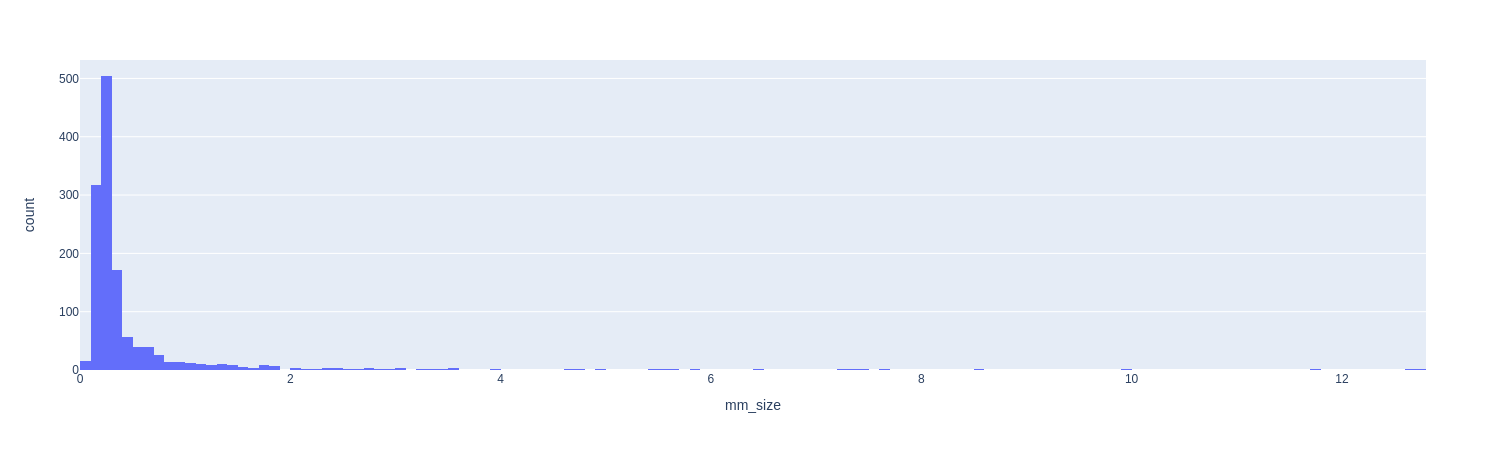

In [176]:
fig = px.histogram(df, x='mm_size')
fig.update_traces(xbins={'size':0.1})
fig.show()

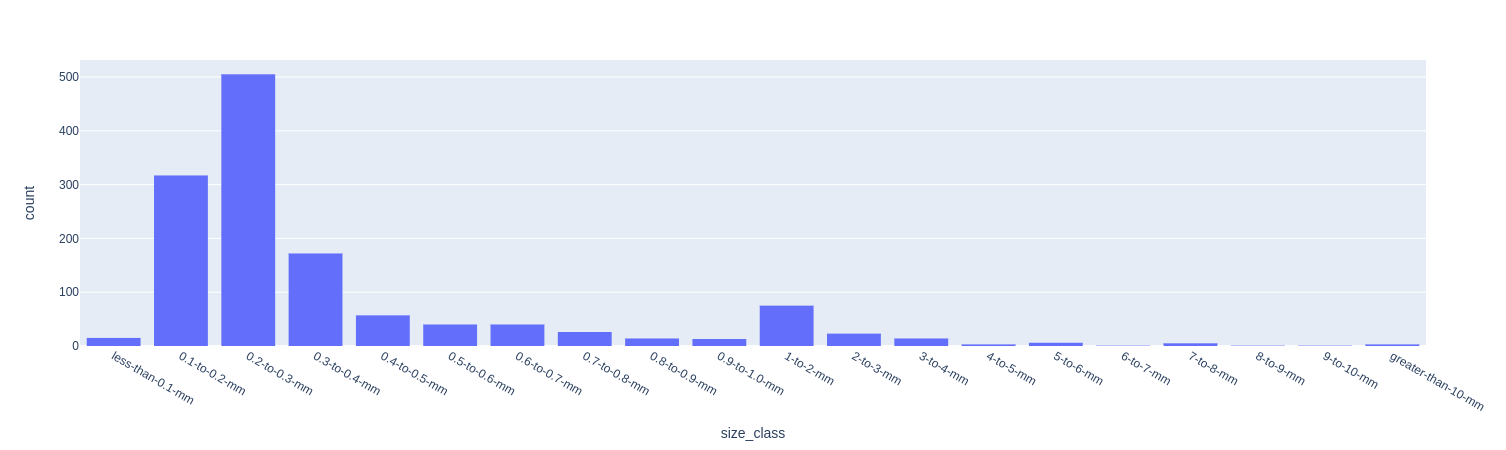

In [177]:
size_class_names = []
for size_class in size_classes:
    size_class_names.append(size_class[0])

fig = px.histogram(df, x='size_class', category_orders={'size_class':size_class_names}    )
fig.show()